In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from scipy.integrate import quad


In [89]:

# Function to calculate the NFW halo density profile
def nfw_halo(r, rs,rhos):
    x = r / rs
    return rhos / (x * (1 + x)**2)


In [90]:


# Function to calculate the Milky Way density profile based on Gondolo-Silk model
def mw_density_GS(r,rs,r0,rhos, Rs, Rsat, Rsp, gamma_sp, rho_sat):
    
    density = np.zeros_like(r)

    # Condition 1: r < 2RS
    mask_condition_1 = r < 2 * Rs
    density[mask_condition_1] = 0

    # Condition 2: 2RS ≤ r < Rsat
    mask_condition_2 = (r >= 2 * Rs) & (r < Rsat)
    density[mask_condition_2] = rho_sat * (r[mask_condition_2] / Rsat)**(-0.5)

    # Condition 3: Rsat ≤ r < Rsp
    mask_condition_3 = (r >= Rsat) & (r < Rsp)
    x = r[mask_condition_3] / Rsp
    density[mask_condition_3] = nfw_halo(Rsp, rs,rhos) * x**(-gamma_sp)

    # Condition 4: r ≥ Rsp
    mask_condition_4 = r >= Rsp
    density[mask_condition_4] = nfw_halo(r[mask_condition_4], rs,rhos)

    return density



In [403]:


# Constants and parameters
rs = 18.6  # Scale radius in kpc
rho0 = 0.383  # Local DM density in GeV/cm^3
r0 = 8.2  # Sun position in kpc
m_chi = 1000# Dark matter mass in GeV
t = 3.15 * 10**17  # in s
rhos = (rho0 * ((r0 / rs) * (1 + r0 / rs)**(2)))
R = 200
# Parameters for the Milky Way density profile
Rs = 3.8 * 10**(-11)  # Example value for Rs
Rsp = 0.34 * 10**(-3)  # Example value for Rsp
gamma_sp = 2.35  # Example value for gamma_sp



In [115]:
sigma_v =  np.logspace(-33,-19, 200)
rho_sat = []
R_sat = []

# Calculating rho_sat and R_sat
for i in range(len(sigma_v)):
    rh = m_chi / (sigma_v[i] * t)
    rho_sat.append(rh) 
    r_sat = (((rhos / rh) * (rs / Rsp) * ((1 + (Rsp / rs))**(-2)))**(1 / gamma_sp)) * Rsp
    R_sat.append(r_sat)

In [94]:
J = []
for i in range(len(sigma_v)):
    integrand = lambda l : (mw_density_GS(np.abs(r0-l),rs,r0,rhos, Rs, R_sat[i], Rsp, gamma_sp, rho_sat[i])**2) * 4 * np.pi
    integral, error = quad(integrand, 0,R+r0)
    J.append(integral)

C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_8052\3737388772.py:4: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral, error = quad(integrand, 0,R+r0)


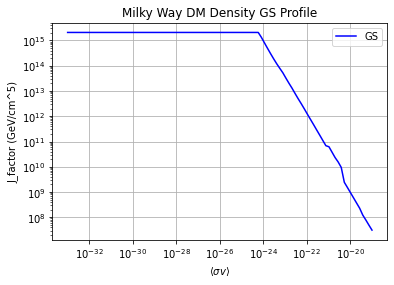

In [96]:
# Calculate J factors
plt.plot(sigma_v, J,label='GS', color='b')
plt.xlabel(r'$\langle \sigma v \rangle$')
plt.ylabel('J_factor (GeV/cm^5)')
plt.title('Milky Way DM Density GS Profile')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_8052\4079117951.py:62: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  result, error = quad(integrand,0, R+r0, args=(rs,r0, rhos, Rs, R_sat[i], Rsp, gamma_sp, rho_sat[i]))


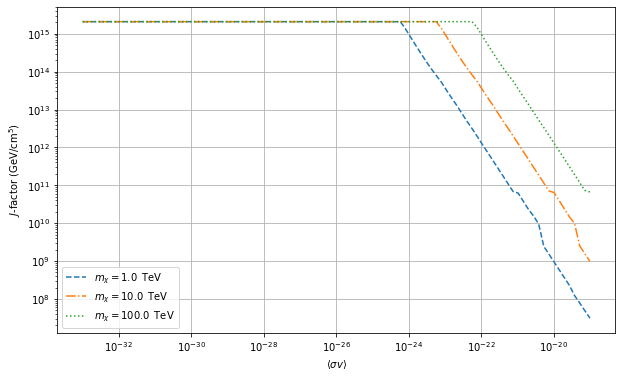

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from scipy.integrate import quad

# Function to calculate the NFW halo density profile
def nfw_halo(r, rs, rhos):
    x = r / rs
    return rhos / (x * (1 + x)**2)

# Function to calculate the Milky Way density profile based on Gondolo-Silk model
def mw_density_GS1(l,rs,r0, rhos, Rs, Rsat, Rsp, gamma_sp, rho_sat):
    r = np.abs(r0-l)
    
    if r < 2 * Rs:
        return 0
    elif 2 * Rs <= r < Rsat:
        return rho_sat * (r / Rsat) ** (-0.5)
    elif Rsat <= r < Rsp:
        x = r / Rsp
        return nfw_halo(Rsp, rs, rhos) * x**-gamma_sp
    else:
        return nfw_halo(r, rs, rhos)


rs = 18.6  # Scale radius in kpc
rho0 = 0.383  # Local DM density in GeV/cm^3
r0 = 8.2  # Sun position in kpc
m_chi_values = [1e3, 1e4, 1e5]  # Dark matter masses in GeV (1, 10, 100 TeV)
t = 3.15 * 10**17  # in s
rhos = rho0 * ((r0 / rs) * (1 + r0 / rs)**2)
R = 200  # Virial radius in kpc

# Parameters for the Milky Way density profile
Rs = 4.11 * 10**(-10)  # Example value for Rs in kpc
Rsp = 0.34 * 10**-3  # Example value for Rsp in kpc
gamma_sp = 2.35  # Example value for gamma_sp

sigma_v_values = np.logspace(-33, -19, 100)  # cm^3/s, annihilation cross-sections

# Calculate rho_sat and R_sat for each sigma_v
def calculate_rho_Rsat(m_chi,sigma_v_values):
    rho_sat = []
    R_sat = []
    for sigma_v in sigma_v_values:
        rho_sat_value = m_chi / (sigma_v * t)
        rho_sat.append(rho_sat_value)
        r_sat_value = (((rhos / rho_sat_value) * (rs / Rsp) * ((1 + (Rsp / rs))**-2))**(1 / gamma_sp)) * Rsp
        R_sat.append(r_sat_value)
    return rho_sat, R_sat

# Integrand for the J-factor
def integrand(l,rs,r0, rhos, Rs, R_sat, Rsp, gamma_sp, rho_sat):
    density = mw_density_GS1(l,rs,r0, rhos, Rs, R_sat, Rsp, gamma_sp, rho_sat)
    return density**2 *4 * np.pi

# Calculate J factors
def calculate_J_factors(m_chi):
    rho_sat, R_sat = calculate_rho_Rsat(m_chi)
    J_factors = []
    for i in range(len(sigma_v_values)):
        result, error = quad(integrand,0, R+r0, args=(rs,r0, rhos, Rs, R_sat[i], Rsp, gamma_sp, rho_sat[i]))
        J_factors.append(result)
    return J_factors

# Plotting
plt.figure(figsize=(10, 6))
linestyles = ['--', '-.', ':']
for i, m_chi in enumerate(m_chi_values):
    J_factors = calculate_J_factors(m_chi)
    plt.plot(sigma_v_values, J_factors, label=f'$m_\\chi = {m_chi / 1e3} \\,$ TeV', linestyle=linestyles[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\langle \sigma v \rangle$')
plt.ylabel(r'$J$-factor (GeV/cm$^5$)')
plt.legend()
plt.grid(True)
plt.show()


In [456]:
import profiles as tp
from profiles import Constants as pc
from profiles import MWDensity as pm

In [457]:
a = pm(halo_types = ['NFW'],spike_types = ['GS'])

In [431]:
a.r = lambda l: np.abs(a.R_sun-l)

r = a.r

In [458]:
sigma_v =  np.logspace(-33,-19, 100)

In [459]:
R_sat,rho_sat=a.calculate_rho_sat_R_sat(1e3,sigma_v)

AttributeError: 'MWDensity' object has no attribute 'calculate_rho_sat_R_sat'

In [411]:


J = quad(a.calculate_density(R_sat[i], rho_sat[i],r)**2 * 4 * np.pi,0,a.R_sun+R)


AttributeError: 'MWDensity' object has no attribute 'calculate_density'